<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Data-preprocessing-steps" data-toc-modified-id="Data-preprocessing-steps-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data preprocessing steps</a></span></li><li><span><a href="#Fit-a-linear-regression" data-toc-modified-id="Fit-a-linear-regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fit a linear regression</a></span></li><li><span><a href="#Fit-a-regularized-regression" data-toc-modified-id="Fit-a-regularized-regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fit a regularized regression</a></span></li><li><span><a href="#Estimate-a-partition-tree" data-toc-modified-id="Estimate-a-partition-tree-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Estimate a partition tree</a></span></li><li><span><a href="#Prediction-with-decision-tree" data-toc-modified-id="Prediction-with-decision-tree-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Prediction with decision tree</a></span></li><li><span><a href="#Estimate-a-random-forest" data-toc-modified-id="Estimate-a-random-forest-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Estimate a random forest</a></span></li><li><span><a href="#Holdout-Performance" data-toc-modified-id="Holdout-Performance-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Holdout Performance</a></span></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Predict-Purchase-(Buy/No)." data-toc-modified-id="Predict-Purchase-(Buy/No).-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Predict <code>Purchase</code> (Buy/No).</a></span></li><li><span><a href="#Naive-model" data-toc-modified-id="Naive-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Naive model</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Decision tree</a></span></li><li><span><a href="#Decision-rules" data-toc-modified-id="Decision-rules-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Decision rules</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Model-choice" data-toc-modified-id="Model-choice-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Model choice</a></span></li><li><span><a href="#AUC-v.s.-Accuracy" data-toc-modified-id="AUC-v.s.-Accuracy-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>AUC v.s. Accuracy</a></span></li></ul></li><li><span><a href="#Task:-Programming-(optional;-not-to-turn-in)" data-toc-modified-id="Task:-Programming-(optional;-not-to-turn-in)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task: Programming (optional; not to turn in)</a></span><ul class="toc-item"><li><span><a href="#Write-a-function-called-improvement-that-takes-two-arguments:" data-toc-modified-id="Write-a-function-called-improvement-that-takes-two-arguments:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Write a function called <code>improvement</code> that takes two arguments:</a></span></li><li><span><a href="#Try-the-CENSUS-data." data-toc-modified-id="Try-the-CENSUS-data.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Try the <code>CENSUS</code> data.</a></span></li></ul></li></ul></div>

**Solution on Tree Models**

BAS 474

Charles Liu

In [1]:
lib <- library
library <- function(...){
    suppressMessages(lib(...))
}

In [2]:
library(regclass)
library(caret)
library(pROC)

# Regression

The `Electricity.csv` datafile contains the daily electricity usage (`Usage`) of about 63 different households in the Knoxville area over the span of about two years.  Of particular interest is developing a predictive model for `Usage`.  With such a model, the utility company can better plan for total and peak demands.  It is known that the most important factor that drives electricity usage is temperature (these households have electric heat and air-conditioning), but the relationship is nonlinear and complex.

* `ID` - household ID

* `Usage` - daily electricity usage of a household

* `PayPlan` - Yes or No depending on whether they have signed up for a payment plan option

* `DaylightHours` - the number of hours of daylight for that day

* `coolinghours` - technical term that describes how hard an AC unit has to work (if at 3pm is 78 degrees, then that hour's contribution to `coolinghours` is 78-65=13; this is summed over all hours of the day, ignoring hours that are below 65)

* `heatinghours` - technical term that describes how hard an electric unit has to work (if at 3pm is 32 degrees, then that hour's contribution to `heatinghours` is 65-32=33; this is summed over all hours of the day, ignoring hours that are above 65)

* `HoursAbove65` - total number of hours for that day where temperature exceeded 65

* `HoursBelow65` - total number of hours for that day where temperature was below 65

* `low` - low temperature of the day

* `high` - high temperature of the day

* `median` - median value of the 24 hourly temperatures of the day

* `mean` - mean value of the 24 hourly temperatures of the day

* `q1` - 25th percentile of the 24 hourly temperatures of the day

* `q3` - 75th percentile value of the 24 hourly temperatures of the day

* `day` - day of week

* `YearMonth` - year and month of that day

## Data preprocessing steps

* Read in `Electricity.csv` with `read.csv`, calling the dataframe `ELECTRICITY`.

* Run the lines of code that generate a "smoothed scatterplot" showing the relationship between Usage and average daily temperature and adds a curve describing the trend.

*  Make (but don't include) a histogram of `Usage`.  It's a little skewed, but let's model the values as-is.

*  NULL out `day`

*  NULL out `ID` 

*  NULL out `YearMonth` 

*  Split the data into 5000 training rows with the remainder being the holdout (use `set.seed(474)` before the `sample` function).

*  The second argument of `sample` is 5000 here instead of something like `0.85*nrow(ELECTRICITY)`.

*  Verify `dim` and `mean` as instructed.

[1] 5000   13

[1] 49054    13

[1] 42.88 42.16

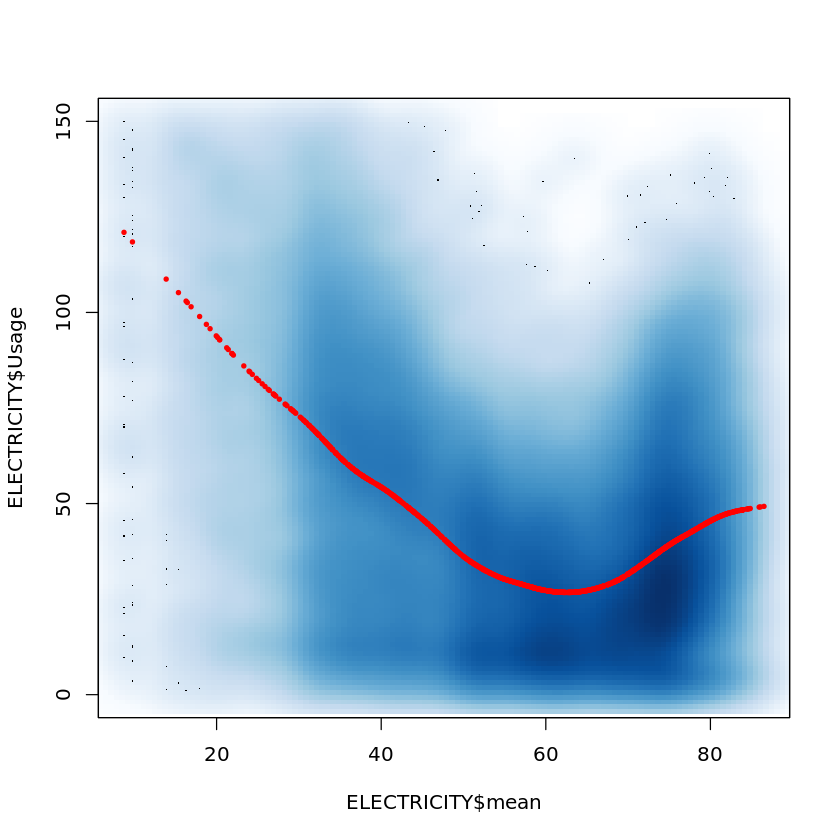

In [3]:
ELECTRICITY <- read.csv("Electricity.csv")
smoothScatter(ELECTRICITY$mean,ELECTRICITY$Usage,ylim=c(0,150))
points(predict(smooth.spline(ELECTRICITY$mean,ELECTRICITY$Usage,lambda=.01)),col="red",pch=20,cex=0.7)

ELECTRICITY$ID <- NULL
ELECTRICITY$day <- NULL
ELECTRICITY$YearMonth <- NULL

set.seed(474); train.rows <- sample(1:nrow(ELECTRICITY),5000)
TRAIN <- ELECTRICITY[train.rows,]; HOLDOUT <- ELECTRICITY[-train.rows,]

dim(TRAIN); dim(HOLDOUT)
round(c(mean(TRAIN$Usage), mean(HOLDOUT$Usage)), digits=2)

## Fit a linear regression

The plot shows that the relationship between mean temperature and usage is nonlinear.  In fact we *know* this relationship isn't well-described by a straight line (on very cold or very warm days `Usage` should be high, but on days where the average temperature is near 65 the `Usage` should be low since heat/air would mostly be turned off).  

Since obviously wrong models can still sometimes be useful, let's fit a linear regression model predicting `Usage` from all available predictors (no interactions, no polynomial terms).  

Set up `fitControl` so that 5-fold crossvalidation is being used to estimate the generalization error, then fit the model by running `train` with the argument `trControl=fitControl` and `preProc=c("center","scale")`. Please `set.seed(474)` immediately before running `train`.

Ignore warnings about `prediction from a rank-deficient fit may be misleading` (this just means there are some highly correlated predictors).

Print out `GLM$results` where `GLM` is created by `train` as well as the results of running `varImp(GLM)` (which gives a list of variable importances from 0-100).

In [4]:
fitControl <- trainControl(method="cv",number=5) 
set.seed(474); GLM <- train(Usage~.,data=TRAIN,method="glm",
                            trControl=fitControl,
                            preProc=c("center","scale"))
GLM$results
varImp(GLM)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


,parameter,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,26.5829,0.2824166,20.59761,0.8884419,0.01559146,0.6230866


glm variable importance

              Overall
PayPlanYes    100.000
heatinghours   26.977
q1             17.260
median         17.188
HoursBelow65   16.993
coolinghours   11.422
q3             11.357
high           10.560
DaylightHours   5.199
HoursAbove65    2.497
low             0.000

## Fit a regularized regression

Set up `glmnetGrid` to be the result of running `expand.grid` which considers all combinations of `alpha` values along the sequence 0, 0.1, 0.2, ..., 0.9, 1 and `lambda` value of 10 raised to the sequence -5, -4.75, -4.5, ..., -1.5, -1.25, -1. It will be used by `train` as the argument `tuneGrid=glmnetGrid`. Name the object created by running `train` to be `GLMNET`.

Remember to `set.seed(474)`, and keep `trControl` and `preProc` for `train`.

Print to the screen the results of running `GLMNET$results[rownames(GLMNET$bestTune),]` (the best tuning parameters found) and run `plot(GLMNET)` to see how the estimated generalization error varies with the tuning parameters.  Regularization usually helps out regression models by quite a bit, what about here?

,alpha,lambda,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
185,1,0.03162278,26.57804,0.2826098,20.57704,0.8935639,0.0158676,0.6411767


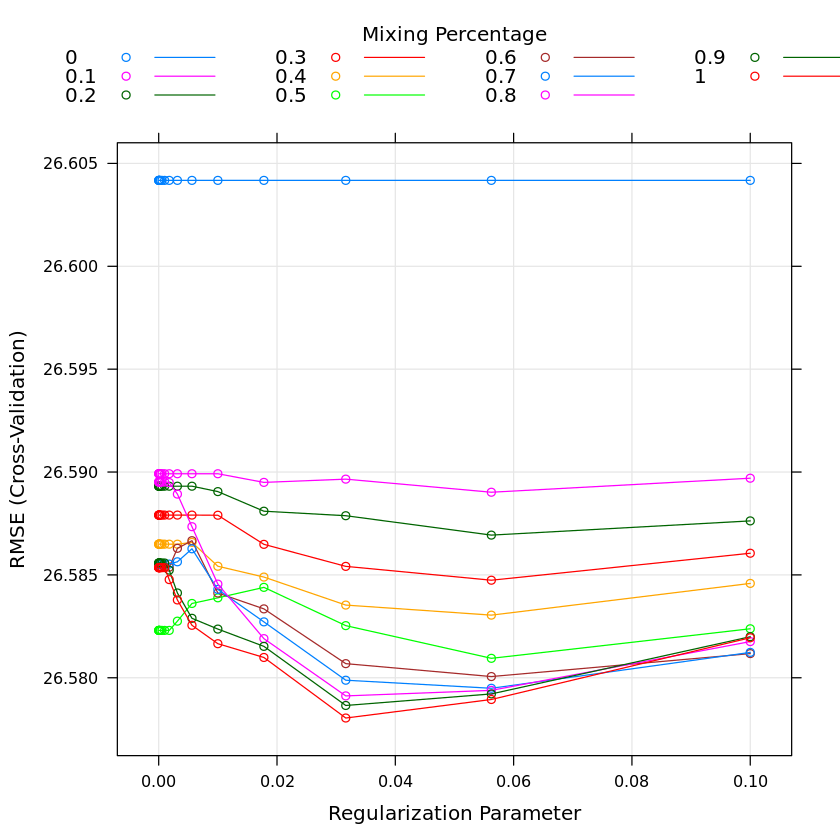

In [5]:
glmnetGrid <- expand.grid(alpha = seq(0,1,.1),lambda = 10^seq(-5,-1,by=0.25))
set.seed(474); GLMNET <- train(Usage~.,data=TRAIN,method="glmnet",
                               trControl=fitControl,
                               tuneGrid=glmnetGrid,
                               preProc=c("center","scale"))
GLMNET$results[rownames(GLMNET$bestTune),]
plot(GLMNET)

Response: No. The estimated generalization errors are comparable to that of multiple linear regression (within one standard deviation).

## Estimate a partition tree

Consider values of `cp` of 10 raised to the sequence of powers -5, -4.8, -4.6, ..., -1.4, -1.2, -1.  Save the output of `train` to `RPART`.  Use `set.seed(474)` and keep `trControl` and `preProc` for `train`.

Print to the best tuning results and plot the train object.

Is this model (when using the optimal choice of cp) better than the linear regression model? Explain.

,cp,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,0.002511886,27.00122,0.261569,20.97334,0.7261625,0.01878262,0.4756275


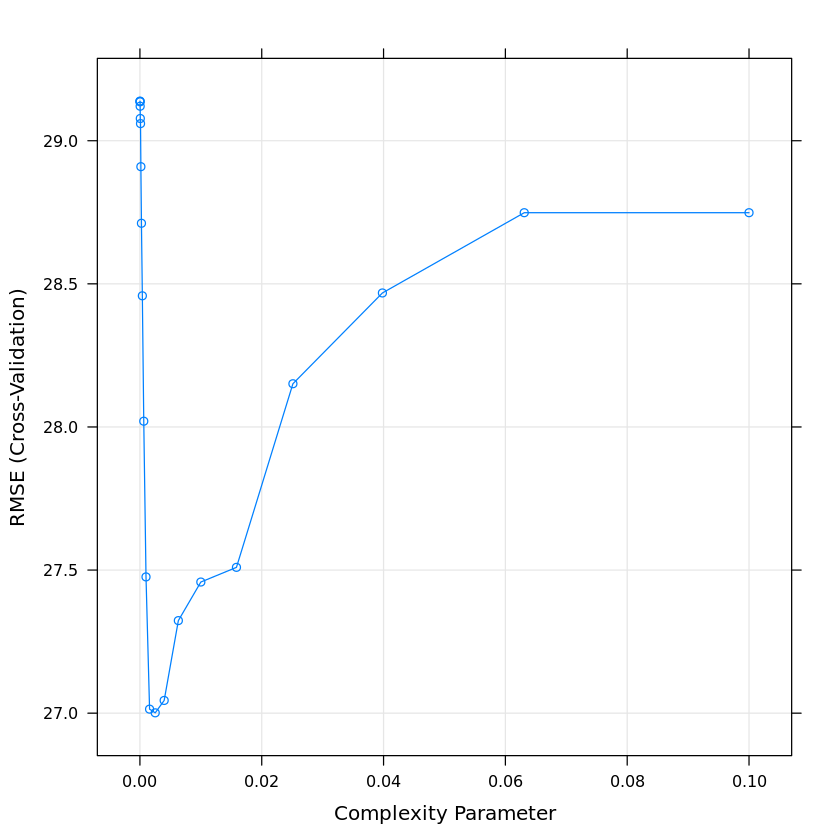

In [6]:
rpartGrid <- expand.grid(cp=10^seq(-5,-1,by=0.2))
set.seed(474); RPART <- train(Usage~.,data=TRAIN,method="rpart",
                              trControl=fitControl,
                              tuneGrid=rpartGrid,
                              preProc=c("center","scale"))

RPART$results[rownames(RPART$bestTune),]
plot(RPART)

**Response**: No! The estimated generalization error is higher (though technically still within 1 SD of the linear regression).

## Prediction with decision tree

Manually fit a vanilla partition model using rpart (predicting Usage from all predictors on TRAIN). Find the predicted value of Usage for someone who IS NOT on the PayPlan (i.e., the answer to the question “Is PayPlan=No?” is “Yes”) on a day with DaylightHours=12, coolinghours=19, heatinghours=550, HoursAbove65=9, HoursBelow65=14, low=50, high=72, median=68, mean=70, q1=62, and q3=71.

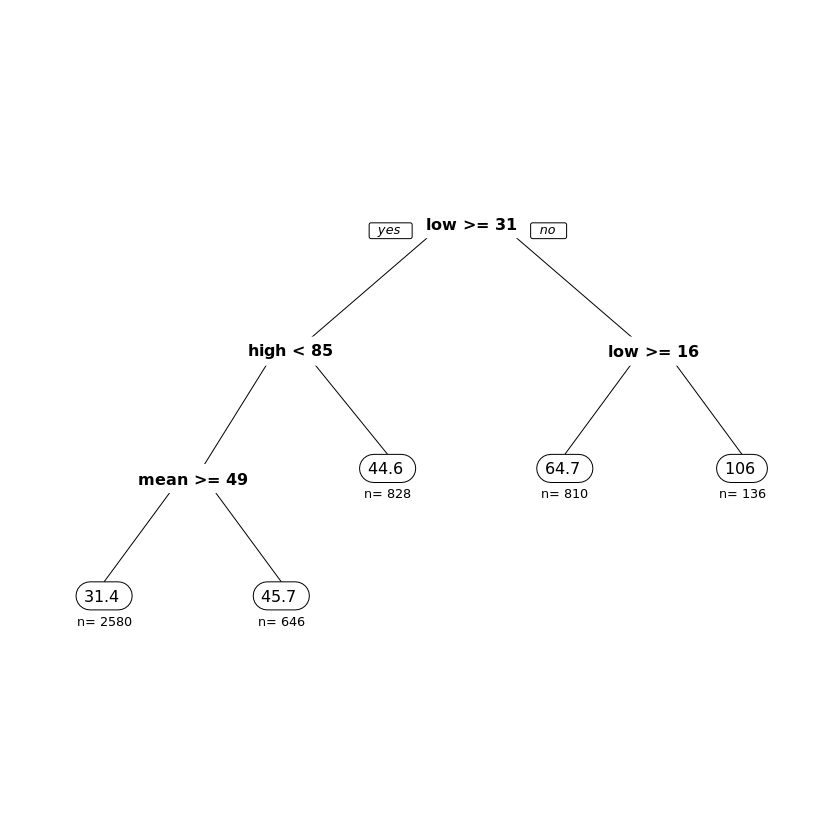

In [7]:
TREE <- rpart(Usage~.,data=TRAIN)  
visualize_model(TREE)

**Response**: 31.4

## Estimate a random forest

Consider values of `mtry` of 1, 3, and 5. Use `set.seed(474)`. 

It will take a few minutes for this to run (my computer took 2.5 minutes). I recommend saving the result of running `train()` to an object called `FOREST`.  Once it has run, copy the output of `FOREST$results` into the R chunk below and hash-tag out each line. In this way, when the document knits, it doesn't have to run this code again.

Is this model better than the linear regression model?  Explain.

,mtry,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,27.1183,0.25296,21.06232,0.8853796,0.01209039,0.609888


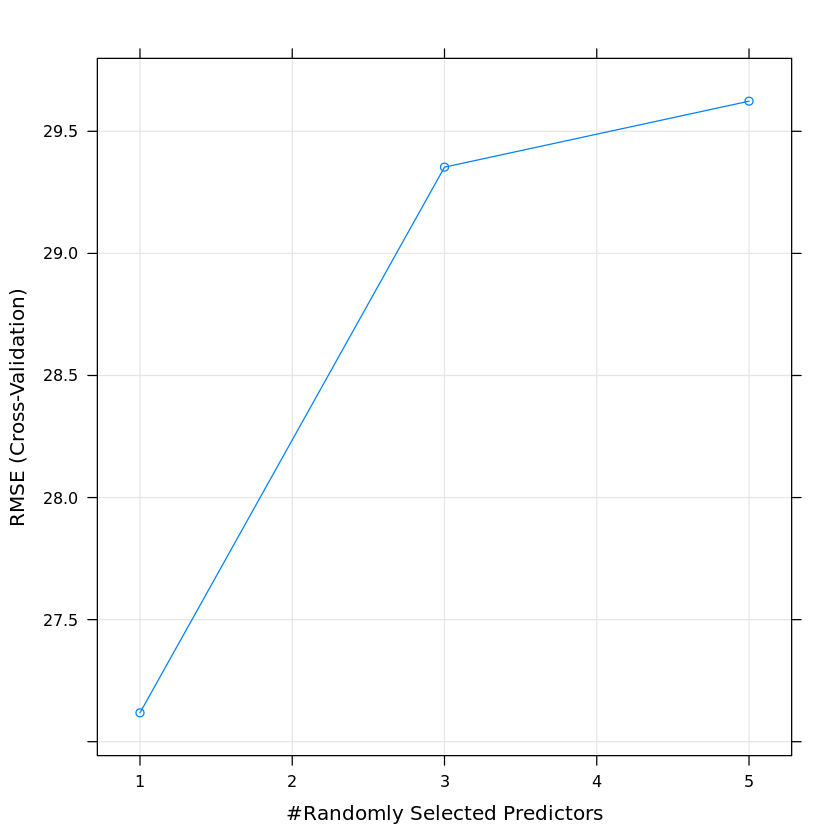

In [8]:
forestGrid <- expand.grid(mtry=c(1,3,5))
set.seed(474); FOREST <- train(Usage~., data=TRAIN, method="rf",
                               trControl=fitControl,
                               tuneGrid=forestGrid,
                               preProc=c("center","scale"))

FOREST$results[rownames(FOREST$bestTune),]
plot(FOREST)

**Response**: No. The estimated generalization error is HIGHER than that of the vanilla linear regression model.

## Holdout Performance

Let’s find the errors on the holdout sample. Is the best one according to cross-validation also the best here?

In [9]:
rbind(GLM$results[order(GLM$results$RMSE)[1],c('RMSE','Rsquared','MAE')],
      GLMNET$results[order(GLMNET$results$RMSE)[1],c('RMSE','Rsquared','MAE')],
      RPART$results[order(RPART$results$RMSE)[1],c('RMSE','Rsquared','MAE')],
      FOREST$results[order(FOREST$results$RMSE)[1],c('RMSE','Rsquared','MAE')])

postResample(predict(GLM,newdata=HOLDOUT),HOLDOUT$Usage)
postResample(predict(GLMNET,newdata=HOLDOUT),HOLDOUT$Usage)
postResample(predict(RPART,newdata=HOLDOUT),HOLDOUT$Usage)
postResample(predict(FOREST,newdata=HOLDOUT),HOLDOUT$Usage)

,RMSE,Rsquared,MAE
,<dbl>,<dbl>,<dbl>
1,26.58290,0.2824166,20.59761
185,26.57804,0.2826098,20.57704
13,27.00122,0.2615690,20.97334
11,27.11830,0.2529600,21.06232


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


RMSE   Rsquared        MAE 
26.3826481  0.2532561 20.5646306

RMSE   Rsquared        MAE 
26.3751202  0.2534615 20.5626109

RMSE   Rsquared        MAE 
26.6527080  0.2394013 20.7783273

RMSE   Rsquared        MAE 
26.6505033  0.2372738 20.8665265

**Response**: Yes, the best one according to cross-validation is also the best one on holdout, but the difference between the best one and the other ones is not so much.

Remember, even if the order is different, we would not switch our choice of best models. The holdout sample is just to see if the estimated errors are about equal to the actual error on new individuals (they are), and we don't use performance here to choose models.

# Classification

The `PURCHASE` dataframe in `regclass` contains a small part of a customer database from a bank.  Of interest is the variable `Purchase`, which tells us if a customer did or did not make a purchase at a major chain retailer in the following 30 days.  Predictor variables include `Visits` (number of visits to the store in the last 90 days), `Spent` (how much the customer has spent in the last 90 days, `PercentClose` (the percentage of purchases this customer makes in general that are within 5 miles of their home address, `Closeset` and `CloseStores` which details how closest the nearest store in the chain is to the customer and how many stores of that chain are within 5 miles of home).

In [10]:
data(PURCHASE, package = 'regclass')
summary(PURCHASE)

 Purchase        Visits           Spent           PercentClose   
 Buy: 6892   Min.   : 0.000   Min.   :    0.00   Min.   :0.0000  
 No :20831   1st Qu.: 0.000   1st Qu.:    0.00   1st Qu.:0.3351  
             Median : 1.000   Median :   56.44   Median :0.5613  
             Mean   : 3.006   Mean   :  189.53   Mean   :0.5259  
             3rd Qu.: 4.000   3rd Qu.:  231.22   3rd Qu.:0.7246  
             Max.   :71.000   Max.   :16651.46   Max.   :1.0000  
    Closest         CloseStores    
 Min.   :  0.000   Min.   : 0.000  
 1st Qu.:  1.323   1st Qu.: 0.000  
 Median :  3.468   Median : 1.000  
 Mean   :  6.962   Mean   : 1.249  
 3rd Qu.:  6.652   3rd Qu.: 2.000  
 Max.   :246.116   Max.   :10.000  

## Predict `Purchase` (Buy/No). 

We will use the data as-is (no scaling/transforming; since tree models don't need it).  Using `set.seed(474)`, randomly split the data into 50% training and 50% holdout.

In [11]:
set.seed(474); train.rows <- sample(1:nrow(PURCHASE),0.5*nrow(PURCHASE))
TRAIN <- PURCHASE[train.rows,]
HOLDOUT <- PURCHASE[-train.rows,]
round(c(mean(TRAIN$Purchase=='Buy'), mean(HOLDOUT$Purchase=='Buy')), digits=3)

[1] 0.252 0.245

## Naive model

Based on the distribution of classes in Purchase, what will the naive model classify everyone in the data (class Yes or class No)? What is the estimated accuracy (i.e., the accuracy of the naive model on the training data).

Grading: 0.5 points

In [12]:
table(TRAIN$Purchase)
mean(TRAIN$Purchase=="No")
# Predicted class for everyone: No
# Estimated accuracy: 0.7505952


  Buy    No 
 3490 10371 

[1] 0.7482144

## Logistic regression

Set up `fitControl` to perform vanilla 5-fold cross-validation (i.e., no repeats) and to focus on the AUC rather than the accuracy. With `set.seed(474)`, use `train` to fit a logistic regression model (all predictors, no interactions) and report the estimated AUC for generalization and the SD of that estimate.

Note: you'll get the warning `The metric "Accuracy" was not in the result set. ROC will be used instead.`, and this is exactly what we want.

In [13]:
fitControl <- trainControl(method="cv", number=5, classProbs=TRUE, summaryFunction=twoClassSummary) 
set.seed(474); GLM <- train(Purchase~.,data=TRAIN,method="glm",
                            trControl=fitControl,
                            preProc=c("center","scale"))
GLM$results

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


,parameter,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,none,0.6184974,0.01260745,0.9908398,0.014077,0.004462009,0.001525056


## Decision tree

Set up `rpartGrid` to be the result of running `expand.grid` to set up a sequence of `cp` parameters that equal 10 raised to the -5, -4.8, -4.6, ..., -3.2, -3 powers.

With `set.seed(474)`, left-arrow the result of running `train` to `RPART`.  Report the value of `cp` that gives the lowest estimated generalization error (`RPART$bestTune`).  Also include the plot `plot(RPART)`, which shows how the estimated ROC varies with `cp`.

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


,cp,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,0.0003981072,0.5917094,0.1475645,0.9071437,0.01490404,0.01719198,0.01325573


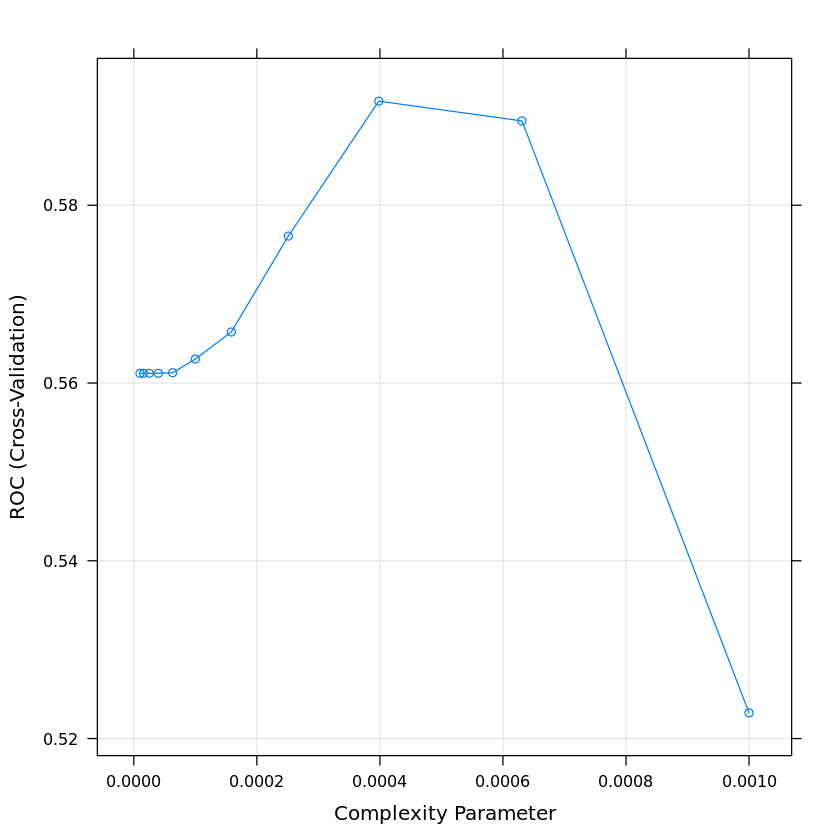

In [14]:
rpartGrid <- expand.grid(cp=10^seq(from=-5,to=-3,by=0.2))
set.seed(474); RPART <- train(Purchase~.,data=TRAIN,method="rpart",
                                 trControl=fitControl,
                                 tuneGrid=rpartGrid,
                                 preProc=c("center","scale"))

plot(RPART)

bestTuneName <- rownames(RPART$bestTune)
bestTuneRow <- RPART$results[bestTuneName,]
bestTuneRow

Response:

Optimal value of cp: {{ bestTuneRow$cp }}

Estimated AUC with the optimal cp: {{ bestTuneRow$ROC }}

Standard deviation of the estimated AUC: {{ bestTuneRow$ROCSD }}

## Decision rules

The following chunk creates a decision tree using a different data set and a larger complexity parameter for better interpretation. Characterize the customers that have the highest probability of buying. I'm looking for something like `Customers who have spent more than 900 and visited at least 7 times in the last 90 days`.

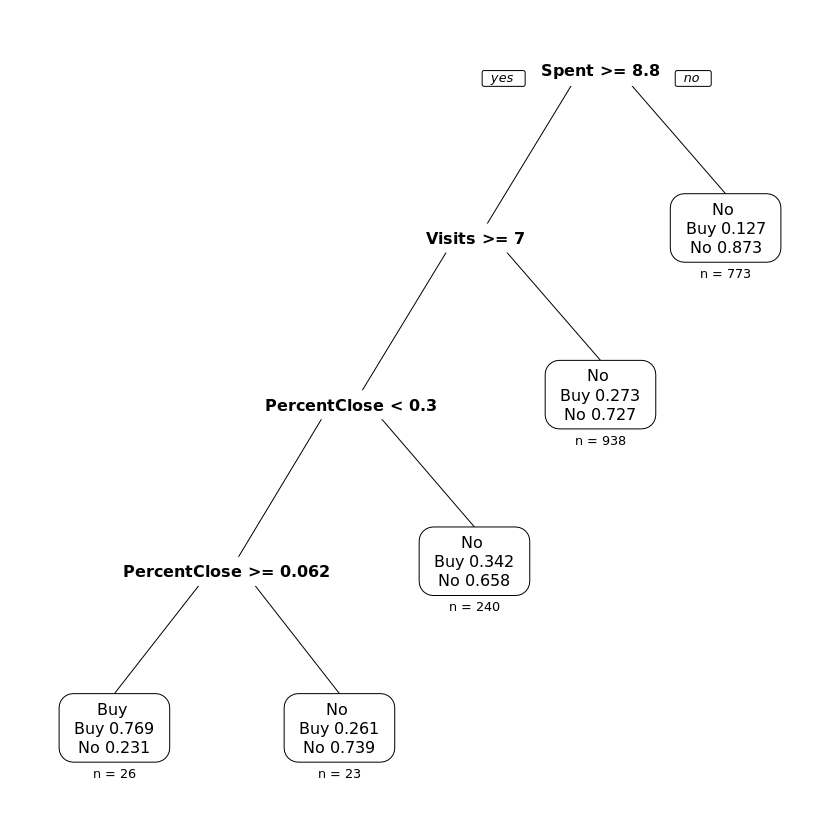

In [15]:
set.seed(693); DTDATA <- PURCHASE[sample(nrow(PURCHASE),2000),]
TREE <- rpart(Purchase~., data=DTDATA, cp=0.005)
visualize_model(TREE)

Response:

To get to the partition with 76.9% probability of Buy, we need Spend >= 8.8, Visits >=7, and PercentClose < 0.062. The customers with the highest probability of buying don't mind to travel for shopping (only 6.2% purchase were within 5 miles) and have visited at least 7 times and have spent at least 8.8 in the last 90 days.

## Random forest

Set up `forestGrid` to have the values of `mtry` equal to 1, 3, and 5 (pure bagging).  Use `train` (with `set.seed(474)` on the same line as `train` immediately before the command) to estimate the generalization errors, left-arrowing the results to `FOREST`.

This one takes a while to fit.  Once it has run, copy the output of `FOREST$results` into the R chunk below and hash-tag out each line (this way, when the document knits, it doesn't have to run this code again since `eval=FALSE` has been set for this chunk).  You should find that `mtry` of 1 is the optimal choice for the tuning parameter.

Explain in English what an `mtry` of 1 means.

In [16]:
forestGrid <- expand.grid(mtry=c(1,3,5))  
set.seed(474); FOREST <- train(Purchase~.,data=TRAIN,method="rf",tuneGrid=forestGrid,
                               trControl=fitControl,preProc=c("center","scale"))
FOREST$results

Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”


,mtry,ROC,Sens,Spec,ROCSD,SensSD,SpecSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.6218231,0.004011461,0.9969145,0.003383616,0.001198653,0.001691041
2,3,0.5861271,0.089111748,0.9354927,0.007106126,0.009026925,0.004930015
3,5,0.5717240,0.104297994,0.9164010,0.006591991,0.003975483,0.005596168


Response:

An mtry of 1 means that every time a new rule is added to a tree in the forest, one predictor is chosen at random to base the rule on, and the optimal one (decrease the impurity the most) is added to the tree.

## Model choice

Is one model a compelling choice versus the others?

**Response**: Not clearly. The `Random Forest` seems the best candidate, but its improvement over `GLM` is not significant larger than their standard deviations. But we can clearly eliminate the vanilla `partition/decision tree`, which is significantly worse.

In [17]:
rbind(GLM$results[order(GLM$results$ROC, decreasing=TRUE)[1],c('ROC','ROCSD')],
      RPART$results[order(RPART$results$ROC, decreasing=TRUE)[1],c('ROC','ROCSD')],
      FOREST$results[order(FOREST$results$ROC, decreasing=TRUE)[1],c('ROC','ROCSD')])

,ROC,ROCSD
,<dbl>,<dbl>
1,0.6184974,0.014076996
9,0.5917094,0.014904037
11,0.6218231,0.003383616


## AUC v.s. Accuracy

The models were “tuned” to maximize the AUC instead of the accuracy in this case, and for good reason. Why does maximizing the AUC rather than the accuracy make sense here?

**Response**: Most likely, this model would be used to select something like the “top 100 customers” who are most likely to buy. Therefore, it’s more important to have the probabilities RANKED correctly, rather than having their predicted classes match up with the actual classes. Further, both types of errors don’t count the same here (it’s MUCH worse to predict someone to “buy” when in actually they don’t (since the model would not recommend taking any sort of action towards them, losing a chance to intervene and get them to potentially purchase) than vice versa, and the accuracy assumes that each type of error is equally important.

# Task: Programming (optional; not to turn in)

##  Write a function called `improvement` that takes two arguments:  

* `PARTITION` - a dataframe whose first column is the y variable (numerical) and whose second column is a numerical x variable

* `threshold` - the threshold for a rule x <= threshold vs. x > threshold

The function should return *the fractional reduction in SSE* when the individuals in the partition are split with the rule that uses the provided threshold.  Recall that the fractional reduction in SSE is 

`( SSE.original - (SSE.1 + SSE.2) )/SSE.original` 

where `SSE.original` is the SSE of the partition, `SSE.1` is the SSE of one of the two resulting partitions, and `SSE.2` is the SSE of the other resulting partitions.

Hints:  inside your function

* Left-arrow into a vector named `y` the values in the first column of `PARTITION`, and left-arrow into a vector named `x` the values in the second column of `PARTITION`

* Create a vector called `part1` which contains the y values of those individuals whose x values are <= `threshold`

* Create a vector called `part2` which contains the y values of those individuals whose x values are > `threshold`

* Left-arrow into `SSE.original` the SSE of the original partition, then left-arrow into `SSE.1` and `SSE.2` the SSEs of the two resulting partitions after the split.

* Use the formula provided to get the fractional reduction in SSE.  Make sure to return it!

* Verify your function works on the dataframe `DATA` and thresholds given below

In [18]:
improvement <- function(PARTITION, threshold) { 
  y <- PARTITION[,1]
  x <- PARTITION[,2]
  part1 <- y[ which(x<=threshold) ]
  part2 <- y[ which(x>threshold) ]
  SSE.original <- sum( (y-mean(y))^2 )
  SSE.1 <- sum( (part1-mean(part1))^2 )
  SSE.2 <- sum( (part2-mean(part2))^2 )
  return ( ( SSE.original - (SSE.1 + SSE.2) )/SSE.original )
}

DATA <- data.frame( yvar = c(4.2,4.1,6.8,6.9,6.5), xvar = c(1.2,1.8,3.1,4.2,5.8) )
improvement(DATA,2.0) #0.9886831
improvement(DATA,3.8) #0.4115226
improvement(DATA,5.7) #0.09876543

[1] 0.9886831

[1] 0.4115226

[1] 0.09876543

## Try the `CENSUS` data.

Our goal is to predict the "y" variable `ResponseRate`.  We want to come up with the best rule based on `HomeownerHH` to split the individuals in the data into two partitions.  Naturally, we'll choose whichever rule of the form `HomeownerHH <= threshold` vs. `HomeownerHH > threshold` gives the largest reduction in the Gini.

* Define a vector `unique.x` to be the unique values of `HomeownerHH` in the `CENSUS` data, sorted from smallest to largest.

* Initialize vectors `thresholds` and `improve` to be empty

* Write a `for` loop that loops through values of `i` from 1 to `length(unique.x)-1`.  In this loop:
   1)  store into the i-th element of `thresholds` the threshold under consideration (a value half-way between `unique.x[i]` and `unique.x[i+1]`, i.e., the average of those two values) 
   2)  store into the i-th element of `improve` the fractional reduction in SSE when using that threshold (i.e., the output of `improvement` where the input dataframe is the `CENSUS[,c("ResponseRate","HomeownerHH")]`  

* Make a scatterplot of `improve` (vertical axis) vs. `thresholds` (horizontal axis) via `plot(improve~thresholds)`

* Report the optimal threshold and the fractional reduction in SSE when using that threshold.

Note:  Use your `improvement` function in the `for` loop!  You can get the reduction with `improvement(CENSUS[,c("ResponseRate","HomeownerHH")],thres)`, where `thres` is the current value of the threshold under consideration.

[1] 0.2933382

[1] 61.95

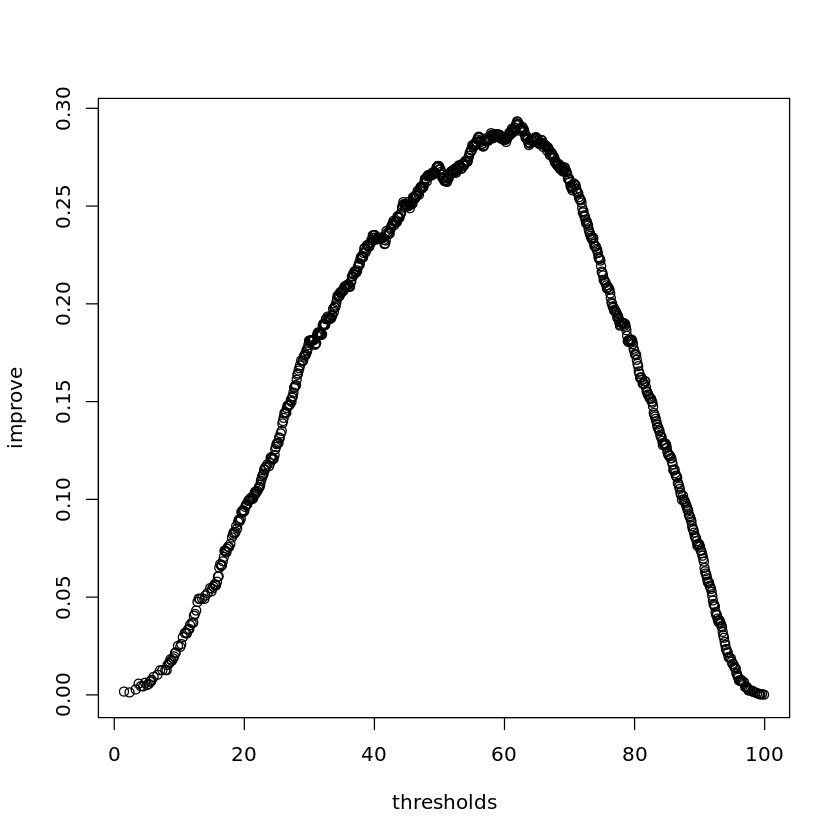

In [19]:
data(CENSUS)
PARTITION <- CENSUS[,c("ResponseRate","HomeownerHH")]
unique.x <- sort( unique(PARTITION$HomeownerHH) )
thresholds <- c()
improve <- c()
for (i in 1:(length(unique.x)-1)) {
  thresholds[i] <- (unique.x[i]+unique.x[i+1])/2
  improve[i] <- improvement(PARTITION, thresholds[i])
}
plot(improve~thresholds)
max(improve)
thresholds[ which.max(improve) ]